In [1]:
from abc import ABCMeta, abstractmethod

import numpy as np
import matplotlib.pyplot as plt

$$\text{minimize}\ x^TAx\quad \text{subject to}\ x\in S^{n-1}$$

In [2]:
import sys

sys.path += ['..', '../..']
from modules.rayleigh_quotient.rayleigh_quotient import (
    RayleighQuotientGD, 
    RayleighQuotientSphereGD, 
    RayleighQuotientCG, 
    RayleighQuotientSphereCG
)

In [6]:
# A = np.array([[2, 1], [1, 2]], dtype=float)
# x0 = np.array([1, 0], dtype=float)

# parameters
initial_step = 1
armijo_param = 0.5
max_iter = 40
size = 5000

# initialize variables
A = np.random.randn(size, size)
A = np.dot(A, A.T)
x0 = np.random.randn(size)
x0 /= np.linalg.norm(x0)

rqgd = RayleighQuotientGD(A=A, initial_step=initial_step, armijo_param=armijo_param, max_iter=max_iter, extended_output=True)
rqsgd = RayleighQuotientSphereGD(A=A, initial_step=initial_step, armijo_param=armijo_param, max_iter=max_iter, extended_output=True)
rqcg = RayleighQuotientCG(A=A, initial_step=initial_step, armijo_param=armijo_param, max_iter=max_iter, extended_output=True)
rqscg = RayleighQuotientSphereCG(A=A, initial_step=initial_step, armijo_param=armijo_param, max_iter=max_iter, extended_output=True)

%time res1 = rqgd.optimize(x0)
%time res2 = rqsgd.optimize(x0)
%time res3 = rqcg.optimize(x0)
%time res4 = rqscg.optimize(x0)

CPU times: user 11.1 s, sys: 32.3 ms, total: 11.2 s
Wall time: 5.6 s
CPU times: user 11.5 s, sys: 34.9 ms, total: 11.5 s
Wall time: 5.77 s
CPU times: user 11.5 s, sys: 39.8 ms, total: 11.6 s
Wall time: 5.83 s
CPU times: user 12.7 s, sys: 41.6 ms, total: 12.7 s
Wall time: 6.39 s


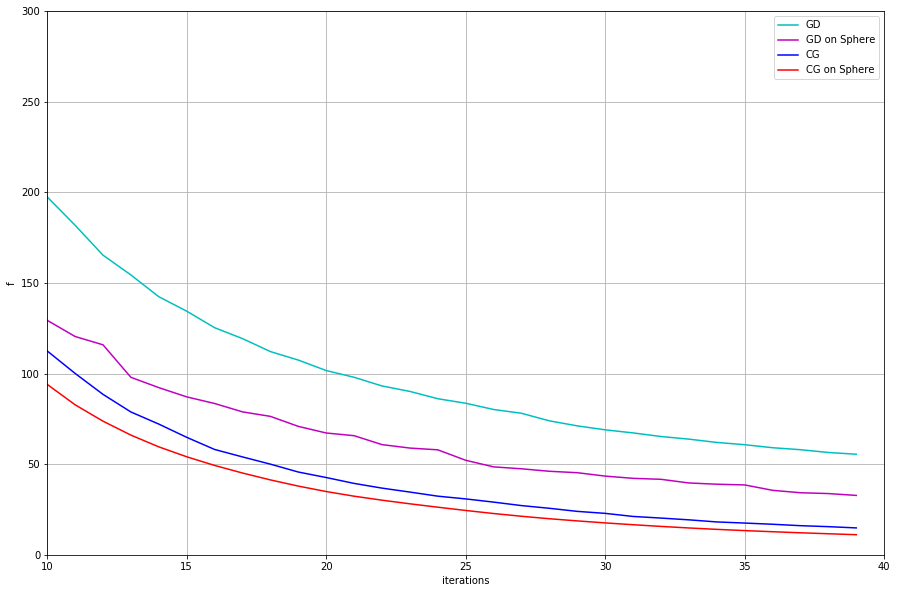

In [9]:
plt.figure(figsize=(15,10))
plt.plot(rqgd.f, 'c', label='GD')
plt.plot(rqsgd.f, 'm', label='GD on Sphere')
plt.plot(rqcg.f, 'b', label='CG')
plt.plot(rqscg.f, 'r', label='CG on Sphere')
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('f')
plt.xlim((10, max_iter))
plt.ylim((0, 300))
plt.legend()
plt.show()